# Waiter Tips Analysis & Prediction

This project aims to predict the amount of tips given by customers using machine learning regression techniques.


In [2]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [56]:
# Load dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Data Preprocessing
We need to check for missing values and convert categorical variables into numerical ones using one-hot encoding.


In [21]:
#Data preproccesing

# Check for missing values
print(tips.isnull().sum())

# One-hot encoding for categorical variables
tips = pd.get_dummies(tips, drop_first=True)
print(tips.head())



total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
   total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99  1.01     2        True       True    False    False     True   
1       10.34  1.66     3       False       True    False    False     True   
2       21.01  3.50     3       False       True    False    False     True   
3       23.68  3.31     2       False       True    False    False     True   
4       24.59  3.61     4        True       True    False    False     True   

   time_Dinner  
0         True  
1         True  
2         True  
3         True  
4         True  


### Exploratory Data Analysis (EDA)
We will visualize the dataset to understand relationships between different features.


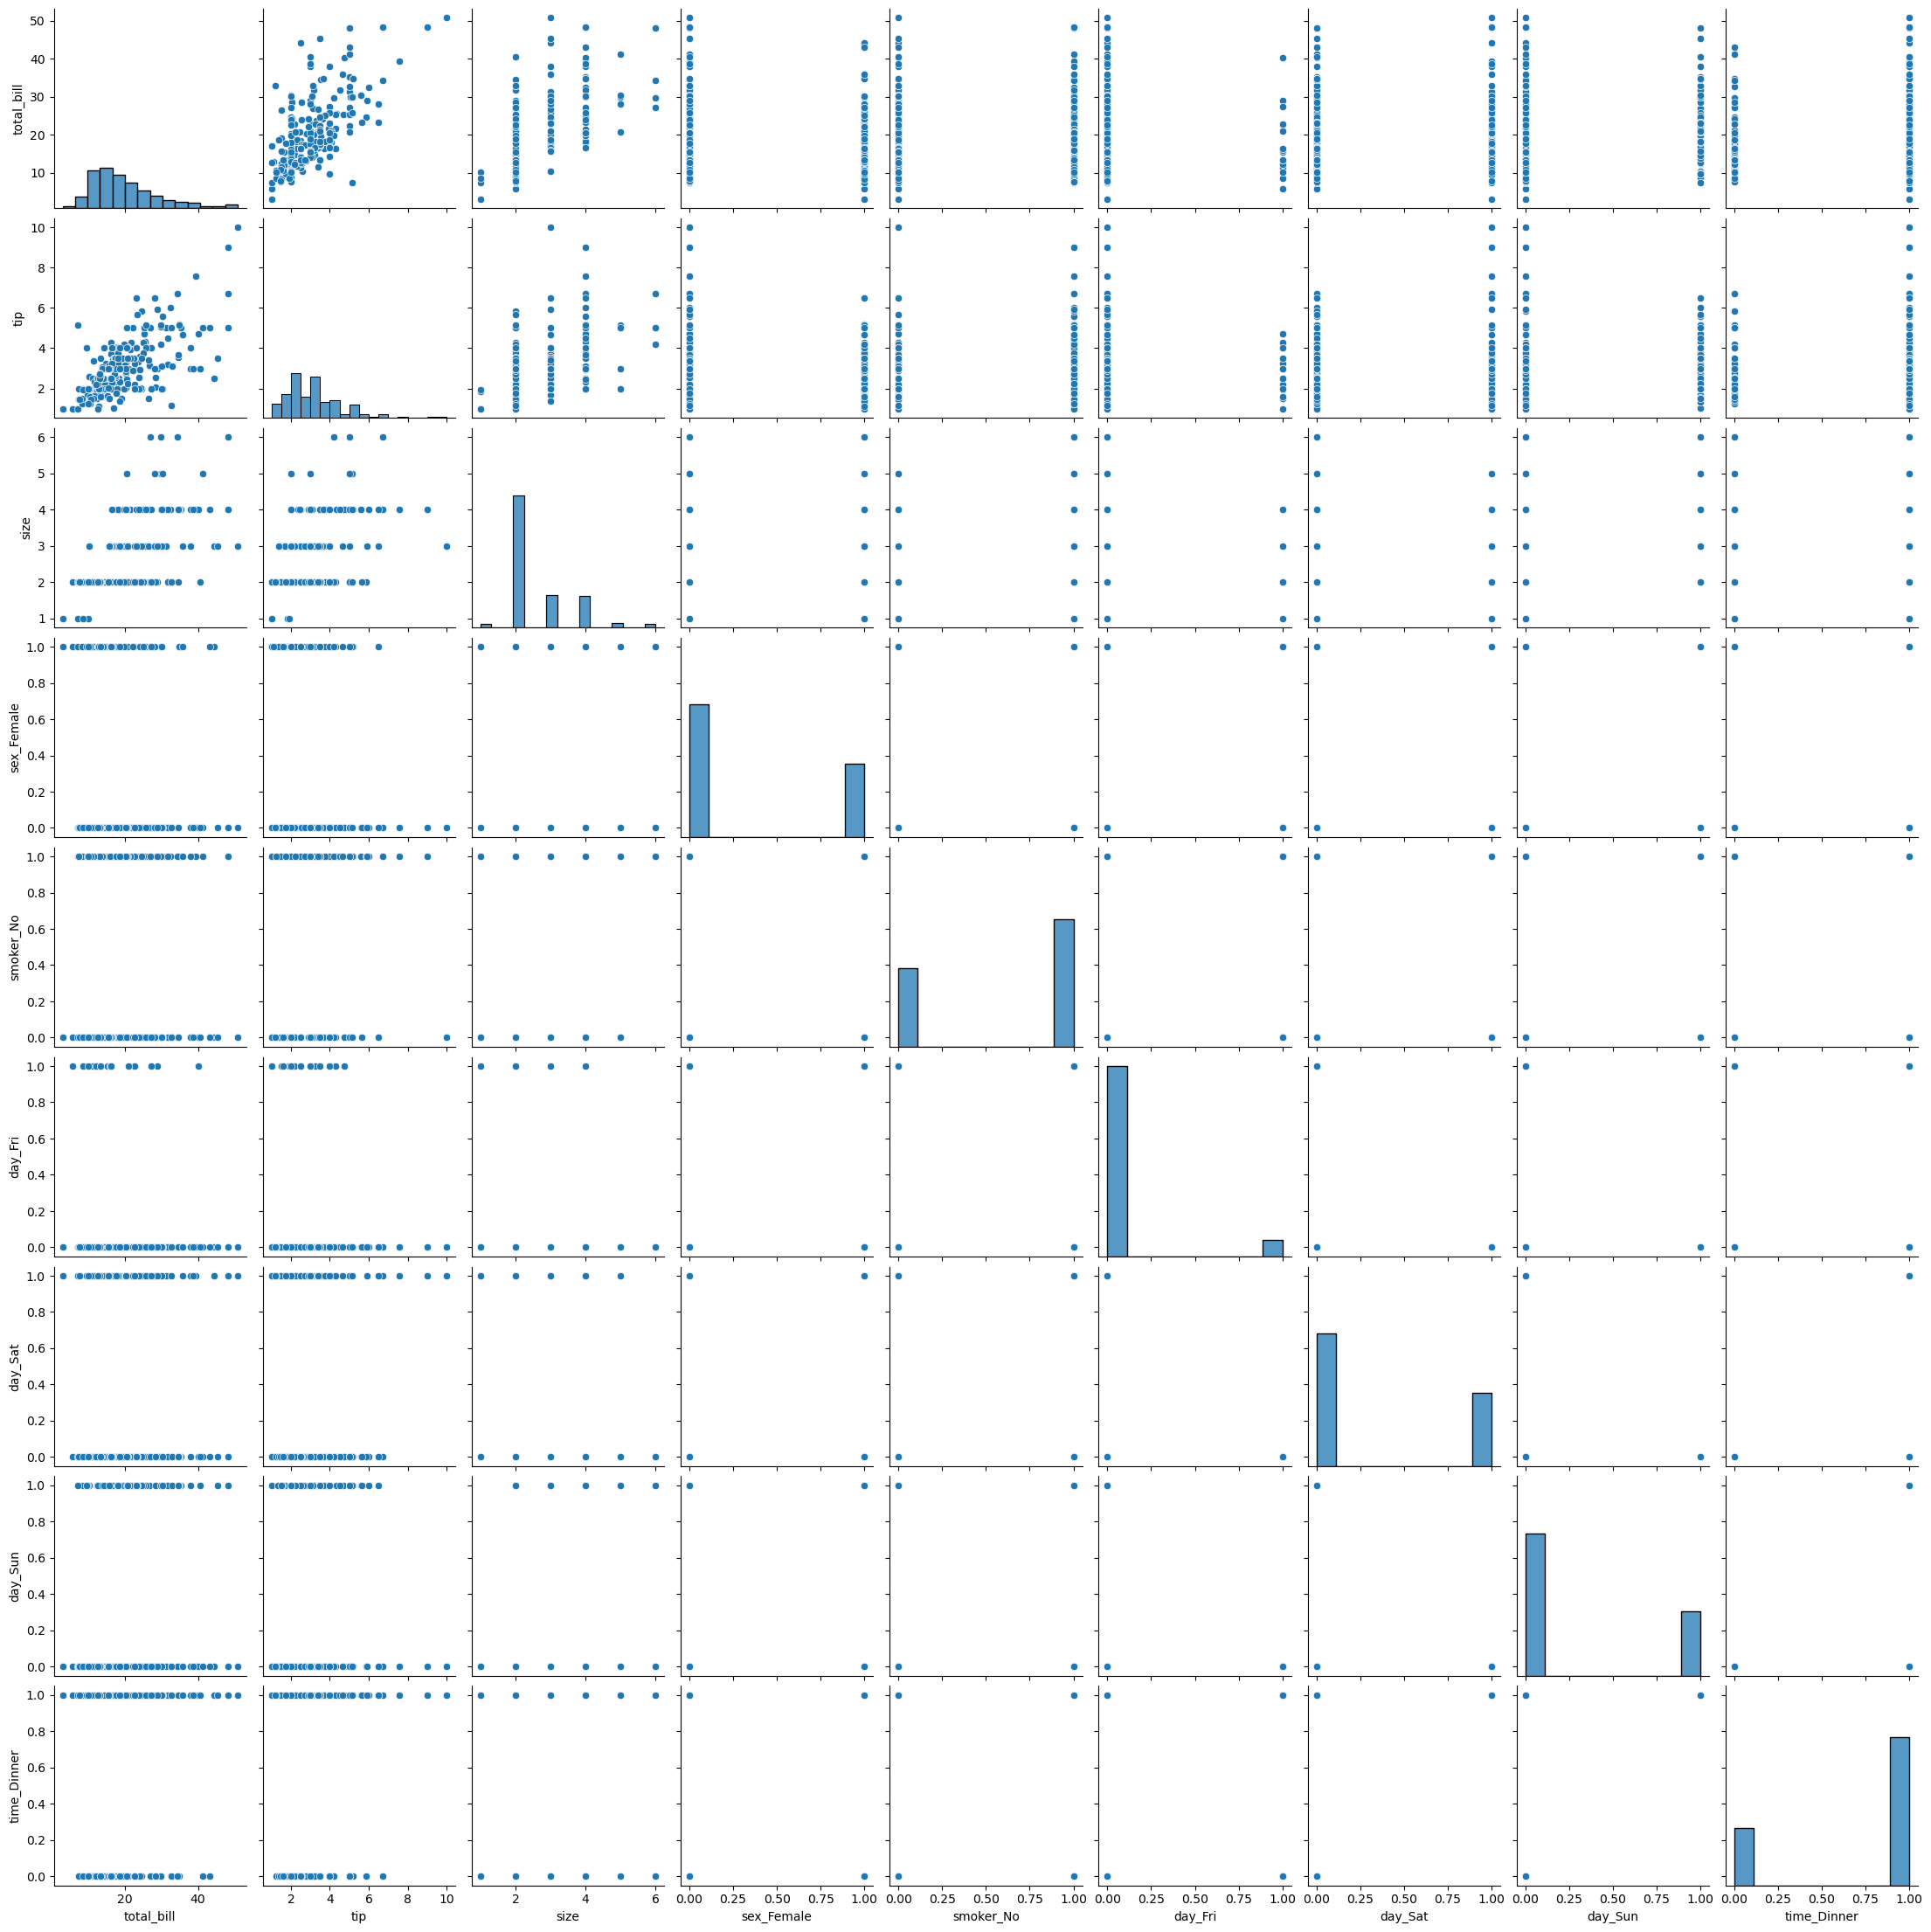

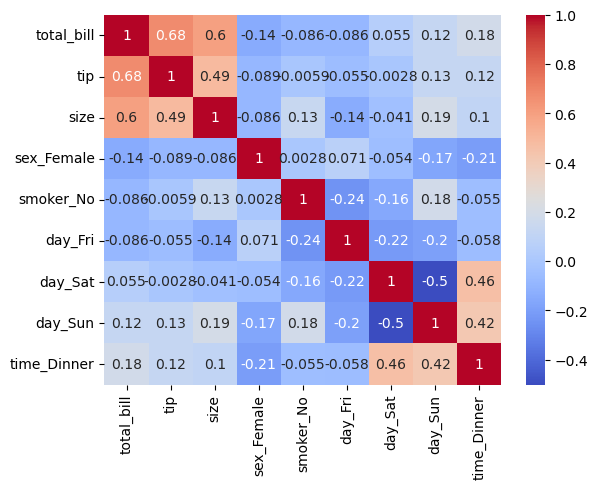

In [23]:
# Pairplot
sns.pairplot(tips)
plt.show()

# Correlation heatmap
sns.heatmap(tips.corr(), annot=True, cmap='coolwarm')
plt.show()


### Split the Data into Training and Testing Sets
We will define our features (X) and target variable (y) and then split the data into training and testing sets.


In [27]:
X = tips.drop('tip', axis=1)
y = tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Model
We will use Linear Regression to train our model on the training data.


In [93]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

### Make Predictions
We will make predictions on the testing set using our trained model.


In [101]:
# Make predictions on the testing set
y_pred = model.predict(X_test)



### Evaluate the Model
We will evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R²) metrics.


In [97]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 0.7033566017436103
R-squared: 0.43730181943482516


### Conclusion
The Linear Regression model has been trained and evaluated on the "Tips" dataset. The performance metrics, including Mean Squared Error (MSE) and R-squared value, provide insights into how well the model predicts the tips given by customers.

### Discussion
- **Mean Squared Error (MSE):** The MSE value indicates the average squared difference between the actual and predicted values. A lower MSE indicates a better fit.
- **R-squared (R²):** The R-squared value represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value closer to 1 indicates a better fit.

### Potential Improvements
- **Feature Engineering:** Create new features based on domain knowledge to improve model performance.
- **Advanced Models:** Explore more complex models such as Decision Trees, Random Forests, or Gradient Boosting.
- **Hyperparameter Tuning:** Optimize the model parameters to enhance predictive accuracy.
